In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('listings.csv')

df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20250617032754,2025-06-17,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,...,5.0,4.75,4.88,NaN,f,6,1,5,0,0.08
1,2595,https://www.airbnb.com/rooms/2595,20250617032754,2025-06-17,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,...,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,https://www.airbnb.com/rooms/5136,20250617032754,2025-06-17,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.0,4.75,4.75,NaN,t,1,1,0,0,0.03
3,6848,https://www.airbnb.com/rooms/6848,20250617032754,2025-06-17,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.8,4.69,4.58,NaN,f,1,1,0,0,1.00
4,6872,https://www.airbnb.com/rooms/6872,20250617032754,2025-06-17,previous scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.0,5.00,5.00,NaN,f,2,0,2,0,0.03


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  int64  
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  int64  
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36320 non-null  object 
 6   description                                   35374 non-null  object 
 7   neighborhood_overview                         19084 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

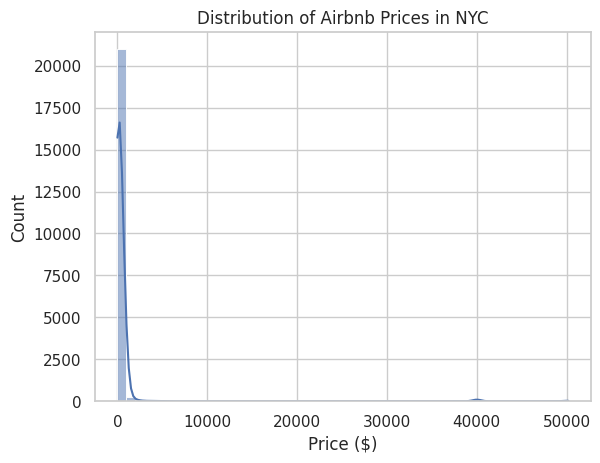

In [5]:
# 1. Распределение цен
sns.histplot(
    df['price'].replace(r'[\$,]', '', regex=True).astype(float),
    bins=50,
    kde=True
)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price ($)')
plt.show()



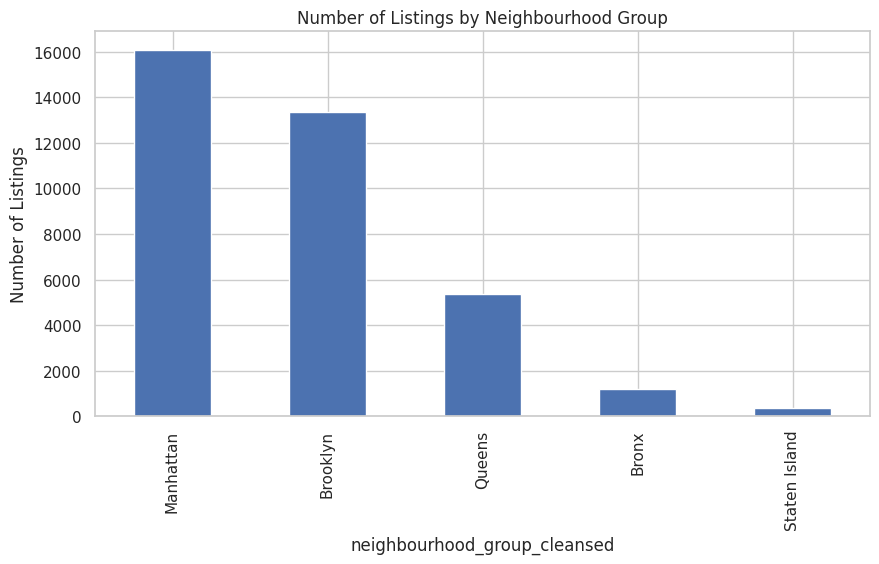

In [7]:
plt.figure(figsize=(10,5))
df['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')
plt.title('Number of Listings by Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


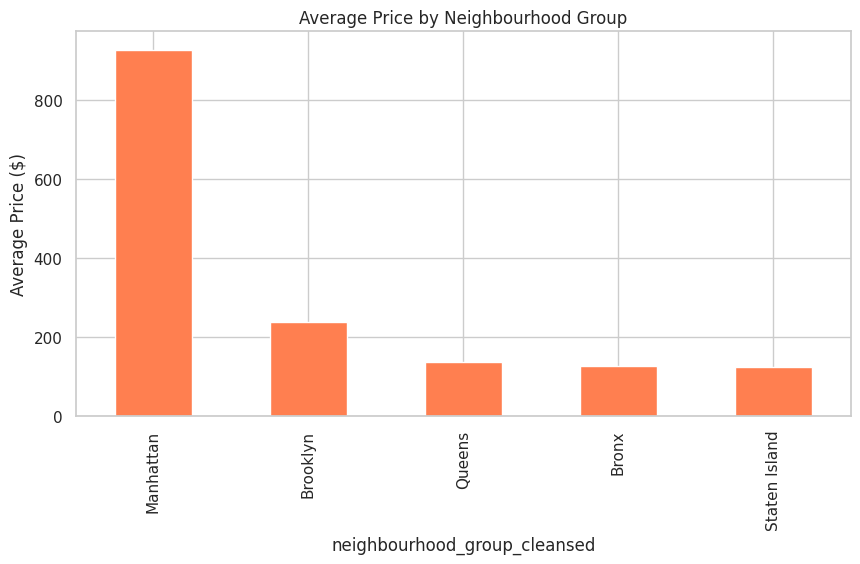

In [10]:
# 3. Средняя цена по районам
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

grouped = df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
grouped.plot(kind='bar', color='coral')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.show()



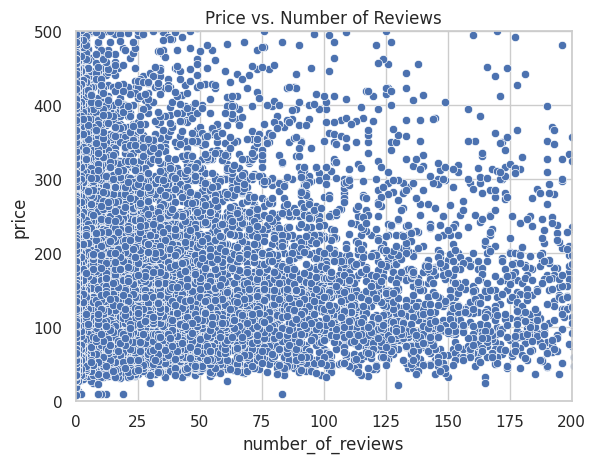

In [11]:
# 4. Цена vs Количество отзывов
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.title('Price vs. Number of Reviews')
plt.show()


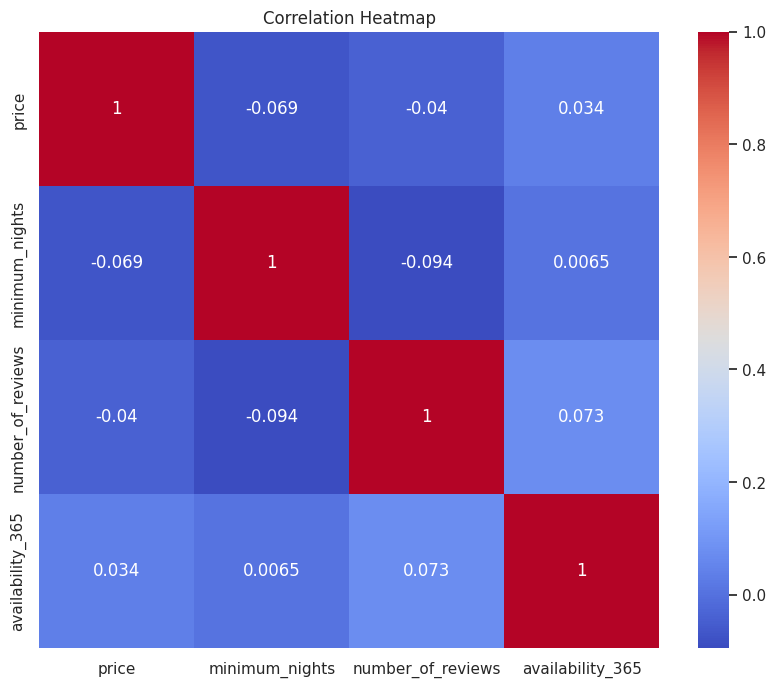

In [12]:
# 📌 Корреляция числовых признаков
plt.figure(figsize=(10,8))
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Итоговые выводы

- Большинство объявлений сконцентрировано в районе Manhattan.
- Средняя цена в Manhattan выше, чем в других районах.
- Зависимость между количеством отзывов и ценой неявная — большинство популярных объявлений стоят до $200.
- Есть смысл исследовать, как влияет тип жилья и минимальные ночи на доход хозяев.